# Welcome

Hi :), I hope u all have a good day. In this notebook we will bulid a simple neural network from scratch without using any framework like tensorflow and pytorch. Just using numpy and maths. Actually it is not necessary but i do that to better understanding how is the neural networks work.

# Overview

In our example we will use dataset contains numbers from 0 to 9 in arabic, so we have 10 classes here. The data is already splited to Train and testing, So we will just do simple operations on it and then get into our model. We will build a simple NN which have only 2 layers .The images of this data is 28*28 pixels so we will have 784 node or unit in each layer.

This is our networl. The orange nodes on left is called Inputs, The first node take the notation X1 and the second node under it called X2 , the third one is called X3 and so on. The blue nodes is our first layer, It will have 784 node in it. The green nodes is our 2nd layer it will have the number of our classes so it will have 10 nodes. Finaly the pink node is our output. 
If we take a look over The input layer X, We will find that it is a matrix for our training example(m), yeach row repressent an input, Actually it will be hard to code it so we will get the transpose os X and then we get each row column represent an input.

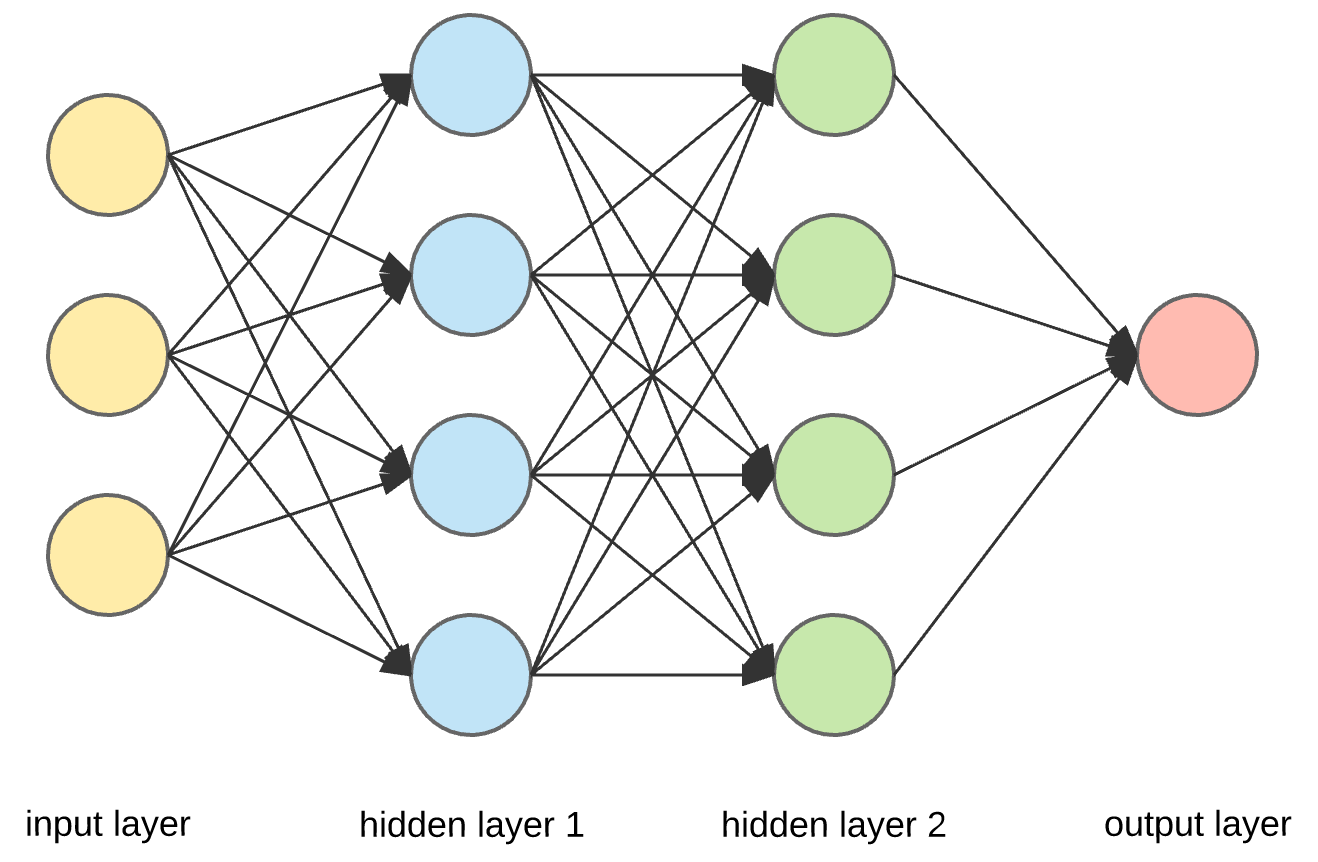

# Let`s begin

For buliding NN from scratch you will go over 8 steps.


 


# Import and read data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

X_train = pd.read_csv("../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv")
y_train = pd.read_csv("../input/ahdd1/csvTrainLabel 60k x 1.csv")
X_test = pd.read_csv("../input/ahdd1/csvTestImages 10k x 784.csv")
y_test = pd.read_csv("../input/ahdd1/csvTestLabel 10k x 1.csv")

print('X_train .shape is',X_train.shape)
print('X_test .shape is',X_test.shape)
print('y_train .shape is',y_train.shape)
print('X_test .shape is',y_test.shape)

X_train .shape is (59999, 784)
X_test .shape is (9999, 784)
y_train .shape is (59999, 1)
X_test .shape is (9999, 1)


In [2]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train.head()

,0
0,1
1,2
2,3
3,4
4,5


In [4]:
X_train=np.array(X_train) # Converting data from df to array
X_train=X_train.T # Transpose to make every coulmn is a an training example
X_train=X_train / 255.0 # Rescale
X_train[:, 0].shape 

(784,)

In [5]:
X_train.shape

(784, 59999)

In [6]:
# Same thing for X_test
X_test=np.array(X_test)
X_test=X_test.T
X_test=X_test / 255.0
X_test[:, 0].shape

(784,)

In [7]:
X_test.shape

(784, 9999)

In [8]:
y_train=np.array(y_train)
y_train=y_train.T
y_train=y_train[0]

In [9]:
y_train.shape

(59999,)

In [10]:
# For y_test
y_test=np.array(y_test)
y_test=y_test.T
y_test=y_test[0]

In [11]:
y_test.shape

(9999,)

# 1. Parameters

In [12]:
def parameters():
    
    # This will generate random values between 0 and 1 so we add -0.5 to make it between -0.5 and +0.5
    
    W1=np.random.rand(10,784) - 0.5
    
    b1=np.random.rand(10,1) - 0.5
    
    W2=np.random.rand(10,10) - 0.5
    
    b2=np.random.rand(10,1) - 0.5

    return W1 , b1 , W2 , b2
    

# 2. Cost Functions

In [13]:
def relu(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    # First it applies e for every Z value and then get sum of all elemnts after adding the e value
    
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Derivative for relu function
def relu_der(Z):
    return Z > 0

# 3. Forward Propagation

In [14]:
def forward_propagation(W1 , b1 , W2 , b2, X):
    # .dot is a function that will return the multiplication of 2 matrix
    
    Z1= W1.dot(X) + b1
    
    A1= relu(Z1)
    
    Z2= W2.dot(A1) + b2
    
    A2= softmax(Z2)
    
    return Z1, A1, Z2, A2

# 4. Hot Encoding

But we need to know why we using this. This function to converts the vector of y to binary class matrix.
suppose that we need to bulid a classifier to classifiy colors, the label column in data was like that 
red 1,
blue 2 and 
green 3 
and so on. The computer wil understand: green is stronger than blue , blue is stronger than red. And we do not mean that, So we need to converts these valuse 1,2,3 to a binary matrix to make computer understand these are ore labels.

First line: 
This will make a matrix of zeros that have shape of m (number of examples) and the max number from data which is 9 then add 1 on it, it will be 10 and this is our classes number 
so the matrix of zeros will have shape of (number of examples, 10)
-
Second line: It will make an array from 0 to the number of examples(m). then it will go for each label in our data then converts it to 1

In [15]:
def one_hot(Y):
    
    one_hot_Y=np.zeros((Y.size, Y.max() + 1)) 
    
    one_hot_Y[np.arange(Y.size) , Y] = 1 
    
    one_hot_Y=one_hot_Y.T
    
    return one_hot_Y

# 4. Backward Propagation

In [16]:
def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    
    m= Y.size
    
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * relu_der(Z1)
    
    dW1 = 1 / m * dZ1.dot(X.T)
    
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

# 5. Update Weights

In [17]:
def update( W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # alpha is the learning rate
    
    W1 = W1 - alpha * dW1
    
    b1 = b1 - alpha * db1
    
    W2 = W2 - alpha * dW2
    
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

# 6. Predictions fucntion

In [18]:
def get_predictions(A2):
    #np.argmax returns the indices of the max elemnt of the array
    
    return np.argmax(A2, 0)

# 7. Accuracy Function

In [19]:
# Will print the predicitions of model and the true values , Then get the accuracy percentage
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# 8. Gradient Descent

In [20]:
def gradient_descent(X, Y, alpha, epochs):
    W1, b1, W2, b2 = parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("epoch: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

# Fit

In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.10, 500)

epoch:  0
[5 5 5 ... 4 5 9] [1 2 3 ... 7 8 9]
0.11926865447757462
epoch:  10
[5 5 1 ... 4 9 9] [1 2 3 ... 7 8 9]
0.23085384756412608
epoch:  20
[4 3 1 ... 4 9 9] [1 2 3 ... 7 8 9]
0.36103935065584425
epoch:  30
[1 3 1 ... 4 9 9] [1 2 3 ... 7 8 9]
0.4600743345722429
epoch:  40
[1 1 1 ... 4 9 9] [1 2 3 ... 7 8 9]
0.5306255104251738
epoch:  50
[1 1 1 ... 0 8 9] [1 2 3 ... 7 8 9]
0.5800096668277804
epoch:  60
[1 1 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.6200103335055585
epoch:  70
[1 1 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.6530442174036234
epoch:  80
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.681961366022767
epoch:  90
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.7061451024183737
epoch:  100
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.7280788013133552
epoch:  110
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.7463457724295405
epoch:  120
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.7618126968782813
epoch:  130
[1 4 1 ... 0 6 9] [1 2 3 ... 7 8 9]
0.775896264937749
epoch:  140
[1 4 4 ... 0 6 9] [1 2 3 ... 7 8 9]
0.7887298121635361
epoch

Nice! We got 0.91 accuracy!

# Visualizations

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


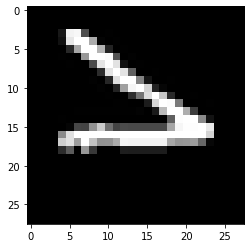

In [23]:
 test_prediction(6, W1, b1, W2, b2)

Prediction:  [4]
Label:  0


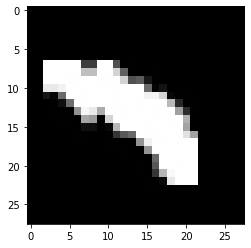

In [24]:
 test_prediction(9, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


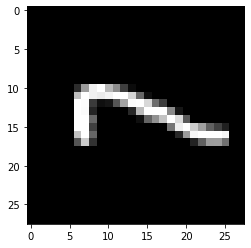

In [25]:
 test_prediction(1, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


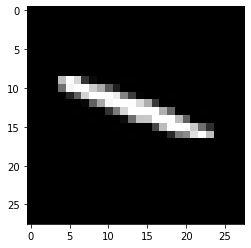

In [26]:
 test_prediction(10, W1, b1, W2, b2)

# Accuracy of testing

In [27]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, y_test)

[1 2 3 ... 7 5 9] [1 2 3 ... 7 8 9]


0.9008900890089009

Good We have 0.88 accuracy on test

# Conclusion

Thank you for reading the whole notebook. If you have any question feel free to ask please. If you like this notebook please upvote. Have a happy coding :)